In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
tfont = {'fontname':'Times New Roman'}


In [62]:
# Define the function F(x)
def F(x):
    return 1 / (1 + np.exp(x))

# Define the Heaviside step function
def heav(x):
    return 1.0 * (x > 0)

## Parameters

TOLERANCE=10

#Excitability
Eseek=1
Ebinge=10.5 
Estop=10.5
#Estr=1.84 
Estr=1.84
Eaps=1
Esetp=6

#Tau
seekTAU=1
bingeTAU=1
stopTAU=1
strTAU=1 

#Drive
seekDRIVE=0.01 
bingeDRIVE=0.5
stopDRIVE=0.5
strDRIVE=-1.4 

#Synaptic Weights
spTOseek=5
seekTOstr=10
apsTOseek=1
vtaTOstr=1
binTOstr=1
binTOstop=1
stopTObin=2
seekTObin=3
spTOstop=1

#Durations
nsSTART=10
nsDUR=0
nsTOstop=0
strCAP=1
daFACTOR=0.15
vtaSLOPE=4

# Initial conditions [seek, binge, stop, STR, alcohol]
y0 = [0, 0.2, 0.2, 0.3, 0] 

# Time span
t_span = (0, 50)


In [63]:
# Define the system of ODEs
def ode_system(t, y):
    seek, binge, stop, stri, ALCOHOL = y
    
    setp = 1 - F(Esetp * (ALCOHOL - TOLERANCE))
    vta = F(vtaSLOPE * (t - (TOLERANCE/3)))
    aps = Eaps * stri
    ns = heav(t - nsSTART) - heav(t - nsSTART + nsDUR)
    
    dseek_dt = (-seek + F(Eseek * (spTOseek * setp - apsTOseek * aps - seekDRIVE))) / seekTAU
    dbinge_dt = (-binge + F(Ebinge * (stopTObin * stop - seekTObin * seek - bingeDRIVE))) / bingeTAU
    dstop_dt = (-stop + F(Estop * (binTOstop * binge - spTOstop * setp + nsTOstop * ns - stopDRIVE))) / stopTAU
    dstri_dt = (-stri / strCAP + F(Estr * (-vtaTOstr * vta - seekTOstr * seek - binTOstr * binge - strDRIVE))) / strTAU
    dALCOHOL_dt = stri
    
    return [dseek_dt, dbinge_dt, dstop_dt, dstri_dt, dALCOHOL_dt]
# Solve the system of ODEs
sol = solve_ivp(ode_system, t_span, y0, dense_output=True)
# Plotting the results
t = np.linspace(0, 50, 500)
y = sol.sol(t)

/var/folders/vw/0t6vz1wn6rn5mgpcy6w188x00000gn/T/ipykernel_37822/351996641.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.8,linewidth = 2.5, color = 'midnightblue')
/var/folders/vw/0t6vz1wn6rn5mgpcy6w188x00000gn/T/ipykernel_37822/351996641.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.8,linewidth = 2.5, color = 'maroon')


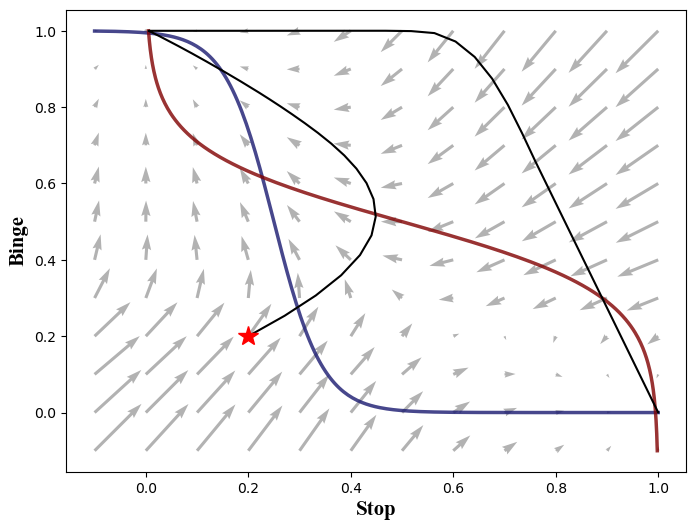

In [67]:
# Plotting the Vector Field
x1min=-0.1
x1max=1
numptsx1=12 # number of x1 points in grid
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=-0.1
x2max=1
numptsx2=12 #number of x2 points in grid
x2list=np.linspace(x2min,x2max,numptsx2)

x1array,x2array = np.meshgrid(x1list,x2list)
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)
t=0 

for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):      
        y0 = np.array([0, x1array[i,j], x2array[i,j], 0.3, 0]) #[seek, binge, stop, STR, alcohol]
        setp = 1-F(Esetp * (y0[4] - TOLERANCE)) 
        dx1dt_array[i,j]=(-y0[1] + F(Ebinge * (stopTObin * y0[2] - seekTObin * y0[0] - bingeDRIVE))) / bingeTAU
        dx2dt_array[i,j]=(-y0[2] + F(Estop * (binTOstop * y0[1] - spTOstop * setp  - stopDRIVE))) / stopTAU

fig = plt.figure(figsize=(8, 6))
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array,alpha=0.3) # quiver: plots vector field

#Calculating the Nullclines
x1list_fine=np.linspace(x1min,x1max,250)
x2list_fine=np.linspace(x2min,x2max,250)

x2_nullcline_list= (F(Ebinge * (stopTObin * x2list_fine - seekTObin * y0[0] - bingeDRIVE))) / bingeTAU ;
x1_nullcline_list=(F(Estop * (binTOstop * x1list_fine - spTOstop * setp  - stopDRIVE))) / stopTAU ;

plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.8,linewidth = 2.5, color = 'midnightblue')
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.8,linewidth = 2.5, color = 'maroon')
plt.xlabel('Stop', **tfont, fontweight = 'bold', fontsize = '15')
plt.ylabel('Binge', **tfont, fontweight = 'bold', fontsize = '15')

#Plotting the Trajectories

t_span = (0, 50)
t = np.linspace(0, 50, 500)
y0 = [0, 0.2, 0.2, 0.3, 0] 
sol = solve_ivp(ode_system, t_span, y0, dense_output=True)
y = sol.sol(t)
binge = y[1]
stop = y[2]
seek = y[0]
binge = y[1]
stop = y[2]
striatum = y[3]
alc = y[4]
setp = 1-F(Esetp*(alc-TOLERANCE))
vta = F(vtaSLOPE * (t - (TOLERANCE/3)))
for n in np.arange(len(alc)):
    if alc[n]>=TOLERANCE:
        thresh = t[n]
        index = n
        break

plt.plot(stop, binge, color = 'black')
plt.plot(stop[0], binge[0], markersize = '15' , marker = '*', color = 'red')
#plt.plot(stop[index-2], binge[index-2], markersize = '10' , marker = 'o', color = 'lightcoral')
#plt.plot(stop[-1], binge[-1], markersize = '10' , marker = 'o', color = 'red')


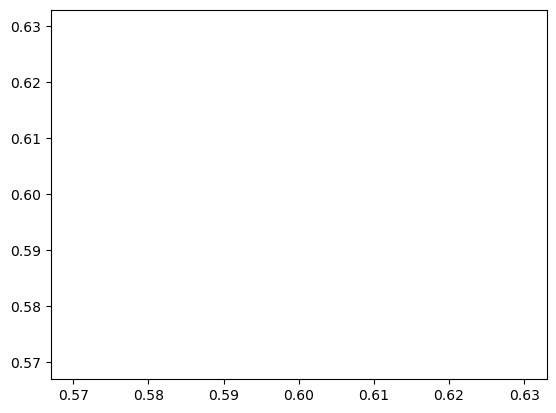